# Spline Interpolation

Source: Saupin (2023) p.92

In [1]:
from numpy import matrix, asarray, dot
import math
import random
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [15]:
# number of nodes used for the approximation
nbSamples = 30

In [3]:
X = [(x + 1)/ nbSamples for x in range(nbSamples)]
Y = matrix([math.log(x) for x in X]).T

In [4]:
def Iplus(xi, x):
    return x - xi if x >= xi else 0.0

In [5]:
def splinify(xMin, xMax, step, x):
    a = [Iplus(xMin + i * step, x)
        for i in reversed(range(int((xMax - xMin) / step)))]
    return a + [1]

In [6]:
def least_square_fitting(X, Y):
    X = matrix(X)
    return inv(X.T * X) * X.T * Y

In [7]:
Xsplines = [splinify(0.0, 1.0, 1, x) for x in X]

In [8]:
A = least_square_fitting(Xsplines, Y)
YregLine = [dot(x, A).item(0) for x in Xsplines]

In [9]:
Xsplines = [splinify(0.0, 1.0, 0.25, x) for x in X]

In [10]:
A = least_square_fitting(Xsplines, Y)

In [11]:
YregCoarse = [dot(x, A).item(0) for x in Xsplines]

In [12]:
Xsplines = [splinify(0.0, 1.0, 0.05, x) for x in X]

In [13]:
A = least_square_fitting(Xsplines, Y)
Yreg = [dot(x, A).item(0) for x in Xsplines]

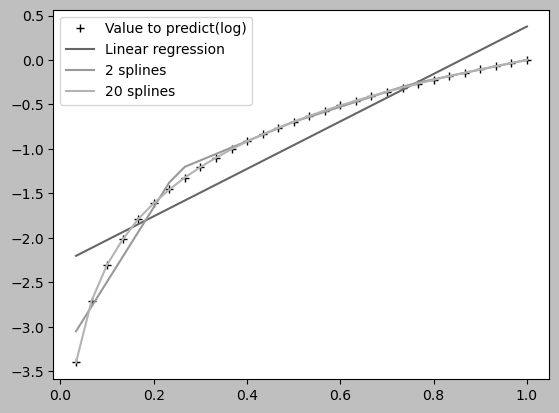

In [14]:
plt.style.use('grayscale')
plt.plot(X,
         asarray(Y),
         '+',
         label='Value to predict(log)')
plt.plot(X,
         YregLine,
         label='Linear regression')
plt.plot(X,
         YregCoarse,
         label='2 splines')
plt.plot(X,
         Yreg,
         label='20 splines')
plt.legend(loc="upper left")
plt.show()